<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy
import pandas
import matplotlib
import seaborn

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [4]:
states_edu = pandas.read_csv('../data/states_edu.csv')
states_edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [11]:
states_edu = states_edu.set_index("STATE")

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math for 8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [93]:
#using Unique to see how many unique years there are
year_arr = states_edu["YEAR"].unique()
print(year_arr," total of: ", len(year_arr), " years")
#There are a total 

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]  total of:  33  years


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [20]:
mich = states_edu.loc["MICHIGAN"]
mmean = mich["AVG_MATH_8_SCORE"].mean()
ohio = states_edu.loc["OHIO"]
omean = ohio["AVG_MATH_8_SCORE"].mean()
print("8th grade Michigan Mean Math Score: ", mmean)
print("8th grade Ohio Mean Math Score: ", omean)
#Ohio has a higher score with a score of 282.25, while michigan's score is 276.16

8th grade Michigan Mean Math Score:  276.1666666666667
8th grade Ohio Mean Math Score:  282.25


Find the average for your outcome score across all states in 2019

In [50]:
#Extracts the year 2019, then finds the mean outcome across all states
year2019 = states_edu[states_edu["YEAR"] == 2019]
year2019["AVG_MATH_8_SCORE"].mean()


281.2641509433962

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [63]:
#Messed up variable at the start, had to reextract the data
unInd = pandas.read_csv('../data/states_edu.csv')
#groups data by state then finds the maximum for each state
state = unInd.groupby("STATE")
state["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

Final feature list: State Revenue, Local Revenue

Feature selection justification: To see if there is any difference between student performance based on how much money the state is making vs local area.

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE', ylabel='AVG_MATH_8_SCORE'>

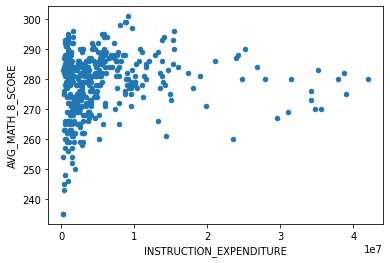

In [86]:
states_edu.plot.scatter(x="STATE_REVENUE", y = "AVG_MATH_8_SCORE"])

Average 8th grade Math score vs State Revenue

**Visualization 2**

<AxesSubplot:xlabel='LOCAL_REVENUE', ylabel='AVG_MATH_8_SCORE'>

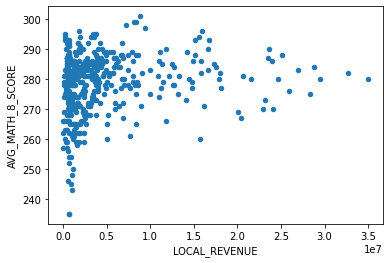

In [66]:
states_edu.plot.scatter(x="LOCAL_REVENUE", y = "AVG_MATH_8_SCORE")

Average 8th grade Math score vs State Revenue

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [67]:
from sklearn.model_selection import train_test_split

In [87]:
X = unInd['AVG_MATH_8_SCORE'].dropna()
y = unInd.loc[X.index][['STATE_REVENUE','LOCAL_REVENUE']]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.1, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: REGRESSION

In [74]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [75]:
# create your model here
model = LinearRegression()

In [92]:

model.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[265. 277. 288. 246. 275. 290. 282. 269. 262. 280. 287. 290. 274. 280.
 269. 261. 294. 280. 288. 268. 290. 280. 287. 287. 286. 270. 284. 288.
 277. 268. 270. 281. 289. 259. 287. 287. 270. 283. 274. 288. 292. 269.
 268. 250. 287. 260. 263. 282. 285. 292. 262. 257. 279. 284. 282. 275.
 272. 296. 287. 270. 284. 243. 273. 277. 298. 284. 272. 286. 284. 290.
 290. 275. 276. 279. 287. 283. 284. 277. 287. 278. 293. 286. 288. 281.
 281. 284. 256. 294. 277. 271. 284. 269. 281. 274. 271. 286. 279. 272.
 290. 252. 289. 270. 269. 278. 275. 286. 272. 269. 280. 271. 297. 283.
 287. 278. 260. 276. 280. 270. 261. 281. 286. 279. 282. 280. 284. 288.
 282. 291. 284. 286. 283. 281. 291. 281. 270. 263. 273. 273. 294. 276.
 281. 287. 270. 286. 283. 282. 286. 293. 288. 280. 284. 264. 271. 281.
 274. 276. 290. 274. 265. 263. 281. 256. 255. 279. 284. 269. 273. 282.
 266. 271. 269. 283. 235. 257. 284. 285. 288. 286. 278. 261. 277. 285.
 283. 282. 284. 282. 278. 270. 268. 292. 262. 283. 266. 286. 286. 286.
 246. 281. 287. 277. 285. 281. 265. 288. 285. 287. 268. 281. 281. 287.
 284. 268. 292. 277. 292. 278. 282. 276. 275. 273. 280. 285. 265. 289.
 272. 285. 289. 280. 288. 274. 245. 295. 274. 289. 284. 271. 291. 288.
 281. 274. 286. 275. 283. 279. 276. 266. 282. 276. 292. 284. 276. 276.
 283. 296. 282. 269. 283. 287. 284. 292. 263. 261. 282. 285. 291. 293.
 280. 277. 284. 266. 275. 231. 267. 253. 285. 281. 274. 259. 276. 285.
 279. 272. 278. 282. 256. 278. 284. 286. 278. 279. 289. 282. 250. 280.
 283. 264. 251. 281. 278. 283. 279. 281. 290. 286. 271. 272. 277. 286.
 293. 287. 284. 282. 288. 270. 262. 266. 284. 273. 257. 290. 276. 254.
 285. 278. 285. 256. 275. 285. 292. 290. 285. 278. 269. 286. 278. 259.
 283. 283. 289. 275. 268. 295. 274. 284. 266. 269. 288. 290. 261. 286.
 281. 271. 276. 286. 291. 279. 268. 279. 286. 289. 286. 286. 287. 265.
 271. 278. 284. 280. 285. 279. 275. 281. 286. 286. 282. 283. 292. 278.
 278. 288. 275. 261. 267. 291. 283. 283. 281. 272. 289. 281. 275. 295.
 270. 279. 274. 282. 284. 286. 288. 272. 268. 284. 281. 281. 279. 264.
 294. 282. 274. 277. 258. 281. 277. 284. 286. 285. 286. 274. 283. 282.
 282. 270. 278. 276. 280. 267. 274. 278. 273. 293. 289. 274. 280. 261.
 294. 277. 293. 269. 274. 282. 256. 266. 291. 275. 285. 280. 260. 272.
 285. 271. 266. 299. 275. 269. 267. 265. 279. 275. 294. 281. 284. 285.
 284. 280. 271. 278. 270. 286. 275. 288. 279. 273. 288. 287. 299. 280.
 277. 284. 271. 289. 276. 286. 272. 285. 284. 235. 286. 286. 271. 279.
 271. 262. 278. 281. 292. 272. 289. 278. 284. 260. 264. 267. 289. 288.
 288. 274. 283. 282. 282. 258. 282. 281. 260. 268. 279. 290. 285. 293.
 279. 285. 282. 279. 274. 267. 284. 281. 280. 285. 287. 283. 280. 286.
 278. 263. 278. 281. 275. 259. 280. 248. 279.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [90]:
y_pred = model.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

In [ ]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = ??
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel(??)

<h2> Summary </h2>

There were a total of 33 years collected for the data, Ohio had a higher average test score for math in 8th grade than Michigan. Massachuessets had the highest maximum math score in 8th grade with a value of 301.
I could not figure out what exactly I was doing wrong with the Machine learning portion.From what I could get from the error I did not clean things up correctly so there were some values that were not numbers which screwed up the machine learning functions. I could not figure out how exactly to do this though and ran out of time :(